In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter



In [2]:
df = pd.read_csv('scopus-annals-of-statistics.csv')

print(df.head())

                                             Authors  \
0                  Shen Y.; Li J.; Cai J.-F.; Xia D.   
1             Kur G.; Gao F.; Guntuboyina A.; Sen B.   
2  Zhang Z.; Goldfeld Z.; Mroueh Y.; Sriperumbudu...   
3                 Kley T.; Liu Y.P.; Cao H.; Wu W.B.   
4                                 Luo Y.; Zhang A.R.   

                                   Author full names  \
0  Shen, Yinan (57546668500); Li, Jingyang (57221...   
1  Kur, Gil (57203803138); Gao, Fuchang (74031394...   
2  Zhang, Zhengxin (57818123600); Goldfeld, Ziv (...   
3  Kley, Tobias (56602847600); Liu, Yuhan Philip ...   
4  Luo, Yuetian (57208153234); Zhang, Anru R. (55...   

                                        Author(s) ID  \
0  57546668500; 57221813827; 22939847400; 5718868...   
1  57203803138; 7403139437; 35068067400; 14021843900   
2  57818123600; 55390337600; 55699828500; 1893722...   
3  56602847600; 59350450500; 18041732400; 7407079428   
4                           57208153234; 55342

# Basic Info

In [3]:
print(df.info()) #Basic info
print(df.describe()) #Summary



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        3137 non-null   object 
 1   Author full names              3137 non-null   object 
 2   Author(s) ID                   3137 non-null   object 
 3   Title                          3142 non-null   object 
 4   Year                           3142 non-null   int64  
 5   Source title                   3142 non-null   object 
 6   Volume                         3142 non-null   int64  
 7   Issue                          3142 non-null   object 
 8   Art. No.                       0 non-null      float64
 9   Page start                     3142 non-null   object 
 10  Page end                       3130 non-null   float64
 11  Page count                     3130 non-null   float64
 12  Cited by                       3142 non-null   i

In [22]:
# Step 1: Extract and process author keywords
# First, create a new DataFrame with just the columns we need
keywords_df = df[['Year', 'Author Keywords']].copy()

# Remove rows with missing keywords
keywords_df = keywords_df.dropna(subset=['Author Keywords'])

# Step 2: Split the keywords and create a new row for each keyword
# Assuming keywords are separated by semicolons or commas
keyword_year_pairs = []

for index, row in keywords_df.iterrows():
    year = row['Year']
    # Split by semicolon or comma (adjust the separator as needed)
    keywords = row['Author Keywords'].split(';')
    
    # Clean up each keyword
    for keyword in keywords:
        keyword = keyword.strip().lower()
        if keyword:  # Only include non-empty keywords
            keyword_year_pairs.append((keyword, year))

# Create a DataFrame from the list
keyword_trends = pd.DataFrame(keyword_year_pairs, columns=['Keyword', 'Year'])


In [23]:
keyword_trends

,Keyword,Year
0,heavy-tailed noise,2025
1,linear regression,2025
2,low-rank matrix,2025
3,robust estimation,2025
4,sparse vector,2025
...,...,...
17297,change point,1996
17298,nonparametric regression,1996
17299,linear estimators,1996
17300,local asymptotic minimaxity,1996


In [24]:

# Step 3: Count occurrences of each keyword by year
yearly_keyword_counts = keyword_trends.groupby(['Year', 'Keyword']).size().reset_index(name='Count')

# Step 4: Find the top 10 keywords overall
top_keywords_overall = keyword_trends['Keyword'].value_counts().nlargest(10).index.tolist()

# Step 5: Filter the data to include only the top 10 keywords
top_keywords_data = yearly_keyword_counts[yearly_keyword_counts['Keyword'].isin(top_keywords_overall)]

# Step 6: Create a pivot table for easier plotting
pivot_data = top_keywords_data.pivot(index='Year', columns='Keyword', values='Count').fillna(0)


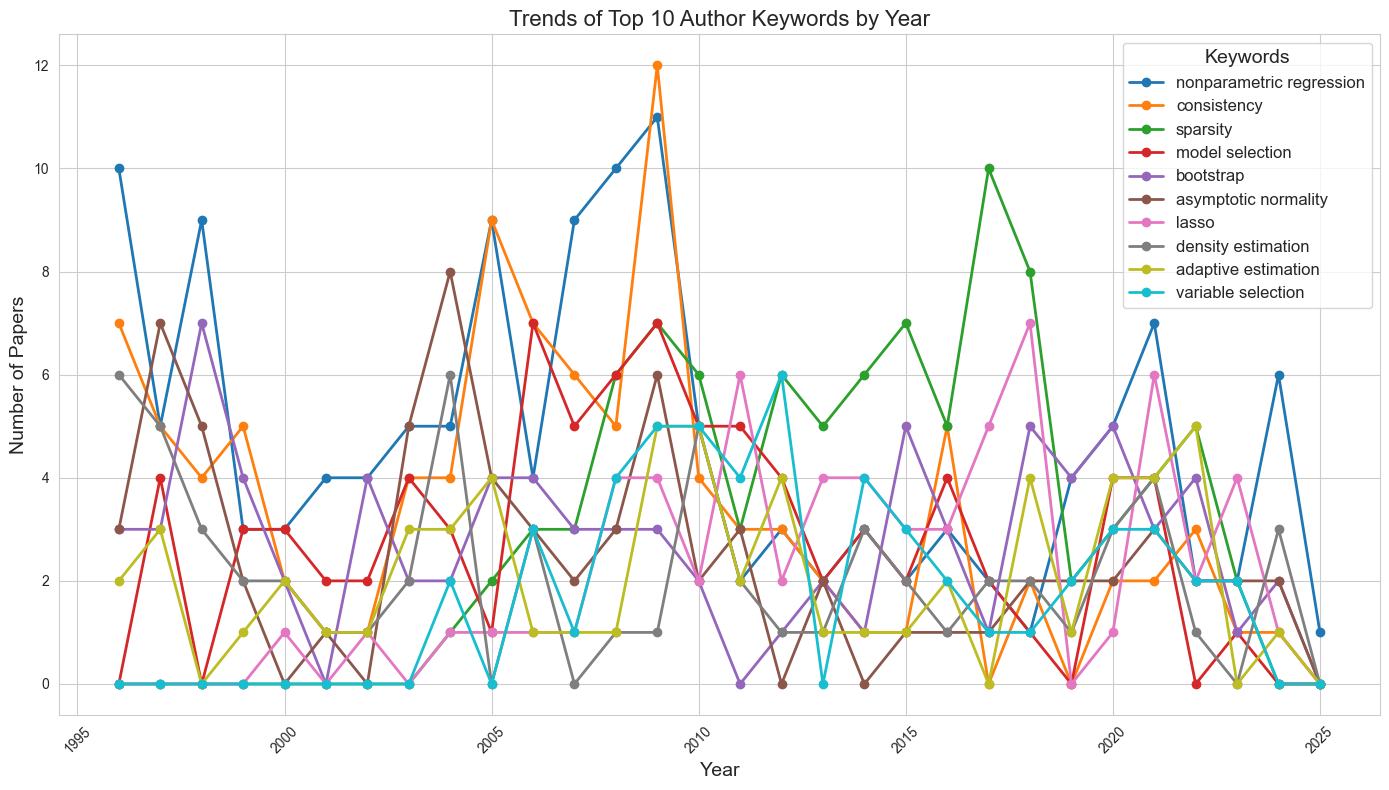

Top 10 keywords:
1. nonparametric regression: 
2. consistency: 
3. sparsity: 
4. model selection: 
5. bootstrap: 
6. asymptotic normality: 
7. lasso: 
8. density estimation: 
9. adaptive estimation: 
10. variable selection: 


In [25]:

# Step 7: Plot the trends
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot each keyword as a line
for keyword in top_keywords_overall:
    if keyword in pivot_data.columns:  # Check if the keyword exists in the pivot table
        plt.plot(pivot_data.index, pivot_data[keyword], marker='o', linewidth=2, label=keyword)

plt.title('Trends of Top 10 Author Keywords by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Papers', fontsize=14)
plt.legend(title='Keywords', fontsize=12, title_fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure if needed
plt.savefig('top10_keywords_trends.png', dpi=300)

# Display the plot
plt.show()

# Print the top 10 keywords for reference
print("Top 10 keywords:")
for i, keyword in enumerate(top_keywords_overall, 1):
    print(f"{i}. {keyword}: ")

/var/folders/ns/9jqyvmnd1nx0t92gt19qy3hr0000gn/T/ipykernel_25463/1528594439.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




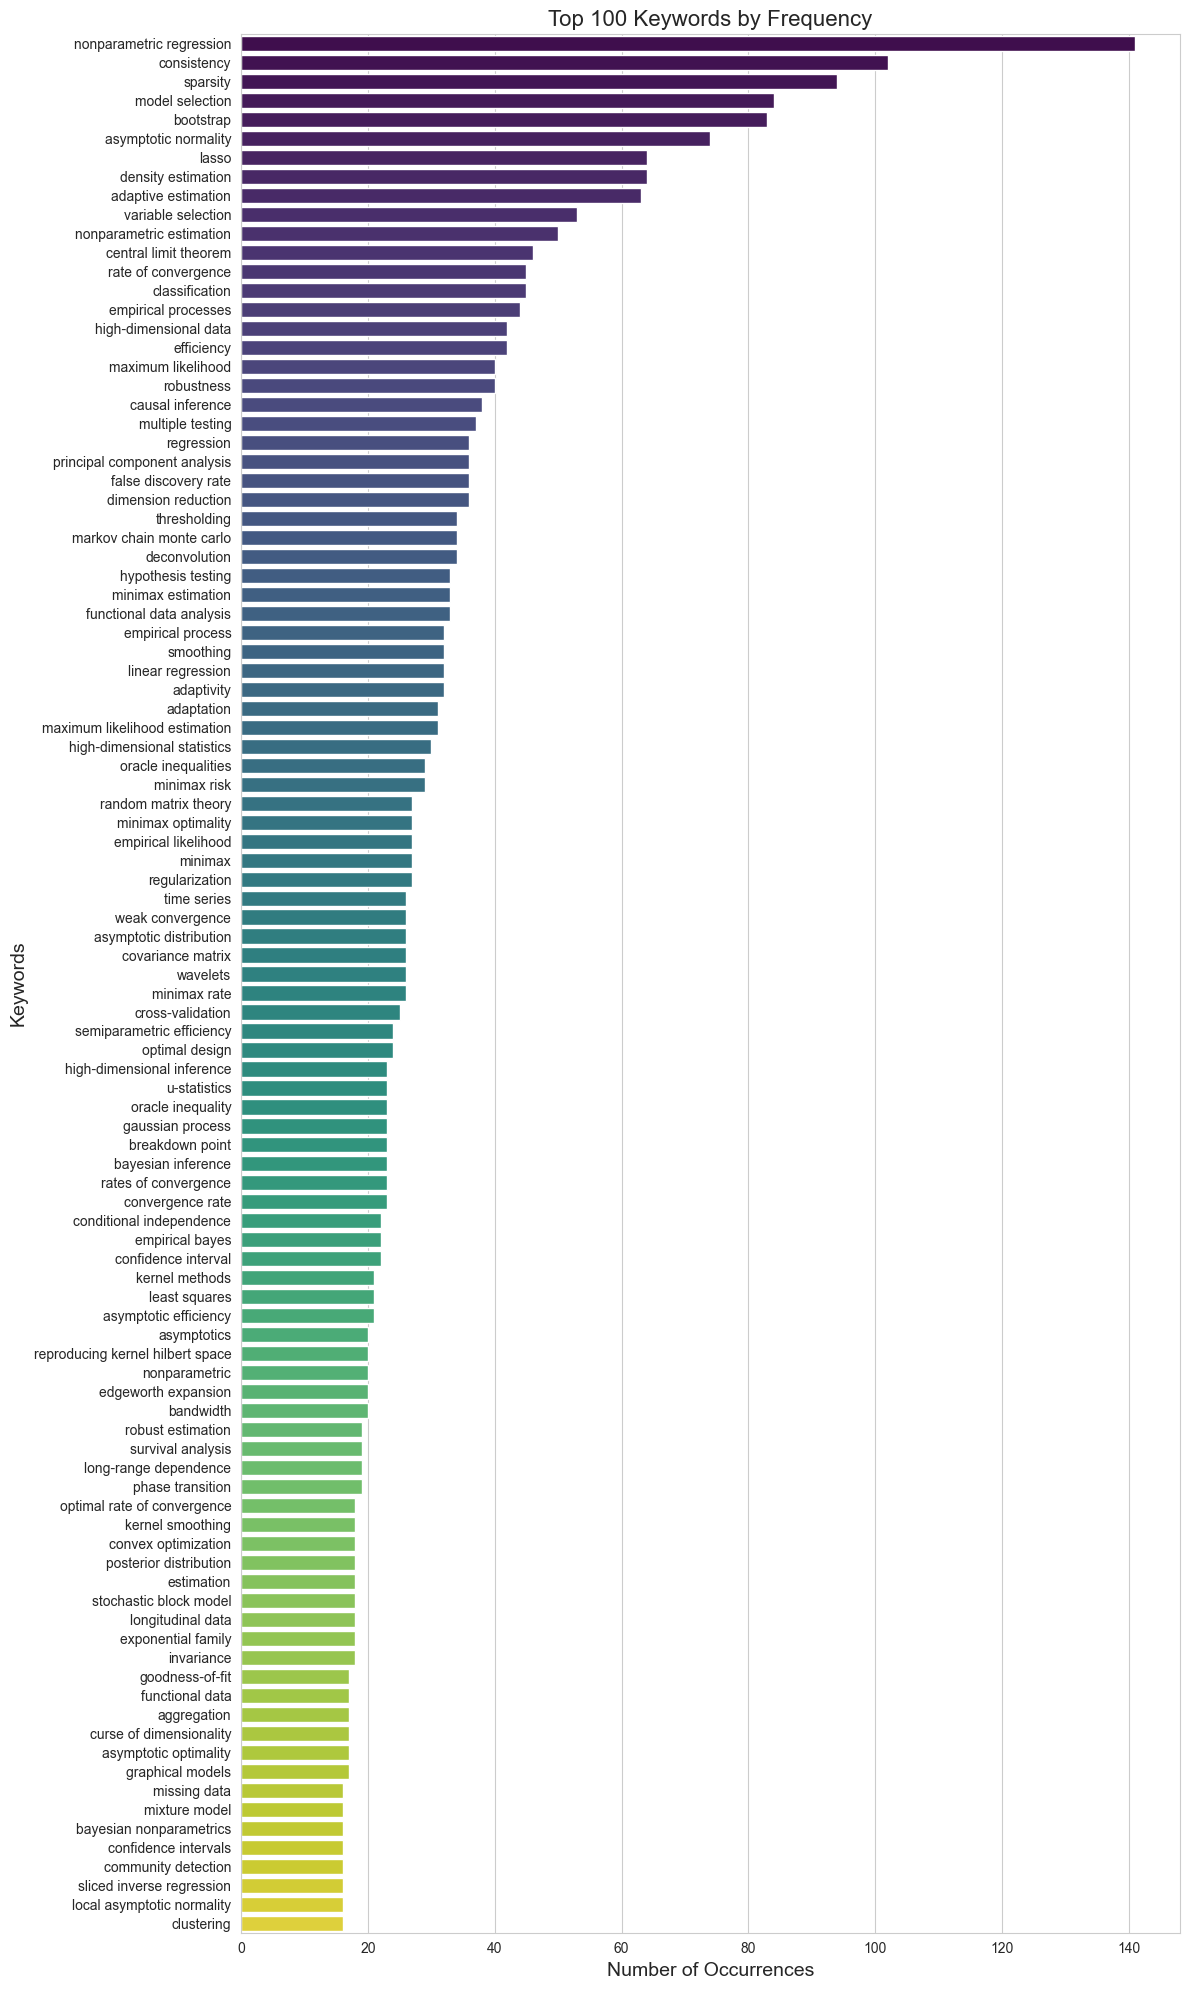

In [26]:
top_n = 100
top_keywords_n = keyword_trends['Keyword'].value_counts().nlargest(top_n)

plt.figure(figsize=(12,20))
sns.barplot(y=top_keywords_n.index, x=top_keywords_n.values, palette='viridis')
plt.title(f'Top {top_n} Keywords by Frequency', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Keywords', fontsize=14)
plt.tight_layout()
plt.savefig('top_keywords_bar_chart.png', dpi=300)
plt.show()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        3137 non-null   object 
 1   Author full names              3137 non-null   object 
 2   Author(s) ID                   3137 non-null   object 
 3   Title                          3142 non-null   object 
 4   Year                           3142 non-null   int64  
 5   Source title                   3142 non-null   object 
 6   Volume                         3142 non-null   int64  
 7   Issue                          3142 non-null   object 
 8   Art. No.                       0 non-null      float64
 9   Page start                     3142 non-null   object 
 10  Page end                       3130 non-null   float64
 11  Page count                     3130 non-null   float64
 12  Cited by                   

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Finding optimal number of clusters...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Clusters: 5, Silhouette Score: 0.0211
  Clusters: 10, Silhouette Score: 0.0242
  Clusters: 15, Silhouette Score: 0.0279
  Clusters: 20, Silhouette Score: 0.0320
  Clusters: 25, Silhouette Score: 0.0332
  Clusters: 30, Silhouette Score: 0.0352

Optimal number of clusters: 30

Cluster Information:
Cluster 0: 437 keywords - Representative terms: consistency, robustness, adaptivity
Cluster 1: 252 keywords - Representative terms: oracle inequalities, minimax risk, minimax
Cluster 2: 297 keywords - Representative terms: monte carlo, brownian motion, entropy
Cluster 3: 196 keywords - Representative terms: nonparametric regression, regression, linear regression
Cluster 4: 399 keywords - Representative terms: model selection, stochastic block model, graphical models
Cluster 5: 108 keywords - Representative terms: conditional independence, coverage probability, bayes factor
Cluster 6: 339 keywords - Representative terms: sparsity, deconvolution, thresholding
Cluster 7: 132 keywords - Represent

/Users/quirtt/Library/Python/3.13/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/quirtt/Library/Python/3.13/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


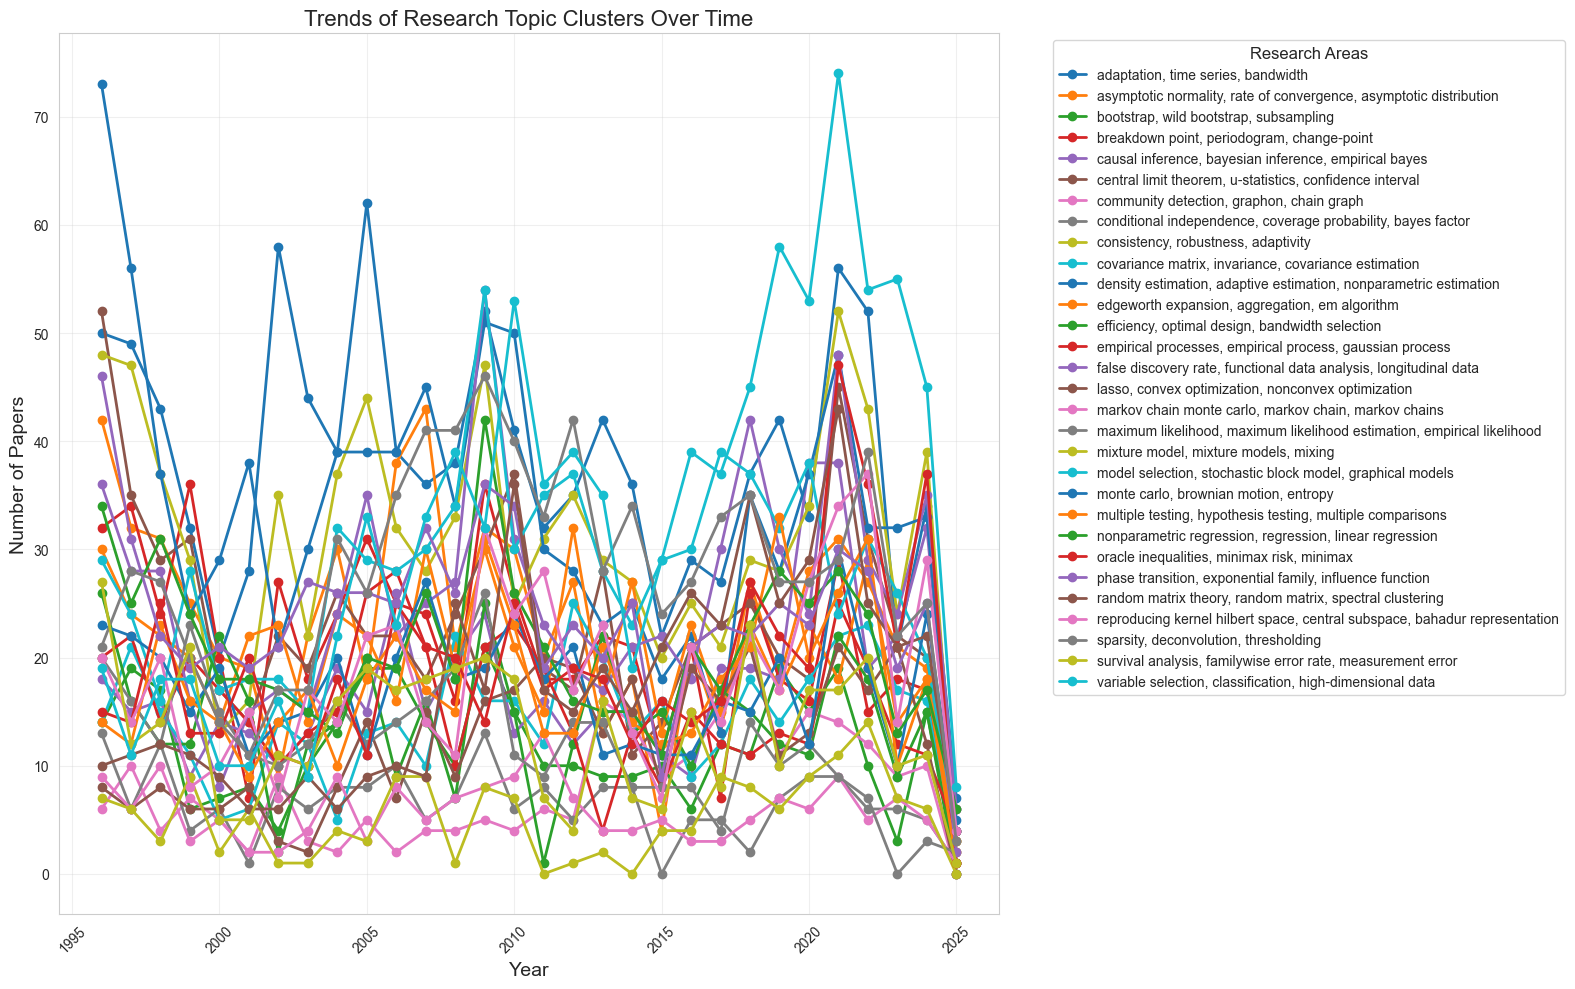

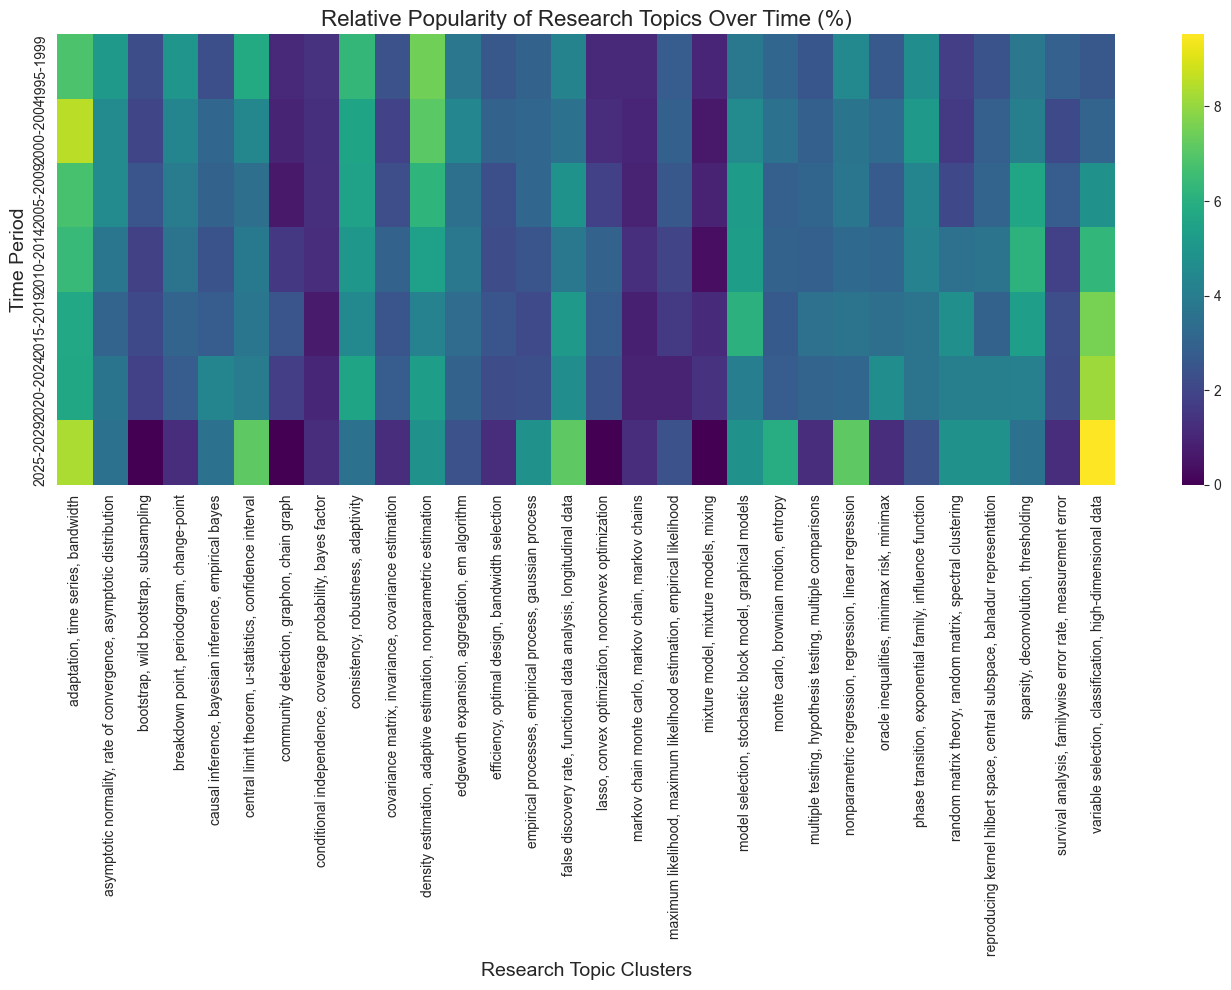


Cluster 9 (adaptation, time series, bandwidth) - Top Keywords by Frequency:
  adaptation: 31
  time series: 26
  bandwidth: 20
  goodness-of-fit: 17
  long memory: 14
  scad: 13
  shrinkage: 13
  jackknife: 11
  higher criticism: 11
  cusum: 10
  jumps: 10
  bic: 9
  white noise: 9
  power: 9
  goodness of fit: 8
  censoring: 8
  heavy tails: 8
  cumulants: 7
  high frequency: 7
  misspecification: 7

Cluster 12 (density estimation, adaptive estimation, nonparametric estimation) - Top Keywords by Frequency:
  density estimation: 64
  adaptive estimation: 63
  nonparametric estimation: 50
  minimax estimation: 33
  robust estimation: 19
  estimation: 18
  m-estimation: 15
  variance estimation: 14
  kernel estimation: 14
  estimating equations: 14
  m-estimator: 12
  semiparametric estimation: 12
  nonparametric density estimation: 9
  james-stein estimator: 9
  shrinkage estimation: 8
  kernel density estimation: 7
  efficient estimation: 7
  functional estimation: 7
  m-estimates: 6


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go
from umap.umap_ import UMAP
import re

# Load the dataset
df = pd.read_csv('scopus-annals-of-statistics.csv')

# Basic Info
print("Dataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 1: Extract and process author keywords
keywords_df = df[['Year', 'Author Keywords']].copy()
keywords_df = keywords_df.dropna(subset=['Author Keywords'])

# Step 2: Split the keywords and convert to lowercase
keyword_year_pairs = []
all_keywords = []

for index, row in keywords_df.iterrows():
    year = row['Year']
    # Split by semicolon or comma
    keywords = row['Author Keywords'].split(';')
    
    # Clean up each keyword
    for keyword in keywords:
        keyword = keyword.strip().lower()  # Convert to lowercase
        if keyword:  # Only include non-empty keywords
            keyword_year_pairs.append((keyword, year))
            all_keywords.append(keyword)

# Create a DataFrame from the list
keyword_trends = pd.DataFrame(keyword_year_pairs, columns=['Keyword', 'Year'])

# Print the number of unique keywords before clustering
unique_keywords = set(all_keywords)
print(f"\nNumber of unique keywords before clustering: {len(unique_keywords)}")

# Step 3: Use Sentence Transformers to convert keywords to embeddings
print("\nGenerating embeddings using Sentence Transformer...")
model = SentenceTransformer('all-MiniLM-L6-v2')  # Small but effective model
unique_keywords_list = list(unique_keywords)
embeddings = model.encode(unique_keywords_list)

# Step 4: Determine optimal number of clusters using silhouette scores
print("\nFinding optimal number of clusters...")
silhouette_scores = []
min_clusters = 5
max_clusters = min(30, len(unique_keywords_list) - 1)  # Max clusters capped at 30
cluster_range = range(min_clusters, max_clusters + 1, 5)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"  Clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.4f}")

# Find the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_clusters}")

# Step 5: Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Create a dictionary mapping keywords to their clusters
keyword_to_cluster = dict(zip(unique_keywords_list, clusters))

# Create a DataFrame to store keywords and their clusters
clusters_df = pd.DataFrame({
    'Keyword': unique_keywords_list,
    'Cluster': clusters
})

# Step 6: Find the most common keywords in each cluster to use as cluster labels
cluster_labels = {}
for cluster_id in range(optimal_clusters):
    cluster_keywords = clusters_df[clusters_df['Cluster'] == cluster_id]['Keyword'].tolist()
    # Count occurrences in the original dataset
    cluster_keyword_counts = {k: all_keywords.count(k) for k in cluster_keywords}
    # Sort by frequency
    sorted_keywords = sorted(cluster_keyword_counts.items(), key=lambda x: x[1], reverse=True)
    # Take top 3 as representative
    top_keywords = [k for k, _ in sorted_keywords[:3]]
    cluster_labels[cluster_id] = ", ".join(top_keywords)

# Print cluster information
print("\nCluster Information:")
for cluster_id, label in cluster_labels.items():
    cluster_size = np.sum(clusters == cluster_id)
    print(f"Cluster {cluster_id}: {cluster_size} keywords - Representative terms: {label}")

# Step 7: Add cluster information to the keyword trends DataFrame
keyword_trends['Cluster'] = keyword_trends['Keyword'].map(keyword_to_cluster)
keyword_trends['Cluster_Label'] = keyword_trends['Cluster'].map(cluster_labels)

# Step 8: Visualize clusters using UMAP for dimensionality reduction
print("\nGenerating UMAP visualization of keyword clusters...")
umap_reducer = UMAP(n_components=2, random_state=42)
umap_embeddings = umap_reducer.fit_transform(embeddings)

# Create a DataFrame for visualization
viz_df = pd.DataFrame({
    'UMAP1': umap_embeddings[:, 0],
    'UMAP2': umap_embeddings[:, 1],
    'Keyword': unique_keywords_list,
    'Cluster': clusters,
    'Cluster_Label': [cluster_labels[c] for c in clusters]
})

# Interactive scatter plot with Plotly
fig = px.scatter(
    viz_df, x='UMAP1', y='UMAP2', color='Cluster_Label',
    hover_data=['Keyword'], title='Clustering of Statistical Research Topics',
    labels={'Cluster_Label': 'Research Area'},
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.update_traces(marker=dict(size=8))
fig.write_html('keyword_clusters_visualization.html')
fig.show()

# Step 9: Analyze trends in clusters over time
cluster_trends = keyword_trends.groupby(['Year', 'Cluster_Label']).size().reset_index(name='Count')
pivot_clusters = cluster_trends.pivot(index='Year', columns='Cluster_Label', values='Count').fillna(0)

# Plot trends of clusters over time
plt.figure(figsize=(16, 10))
for cluster_label in pivot_clusters.columns:
    plt.plot(pivot_clusters.index, pivot_clusters[cluster_label], marker='o', linewidth=2, label=cluster_label)

plt.title('Trends of Research Topic Clusters Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Papers', fontsize=14)
plt.legend(title='Research Areas', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cluster_trends_over_time.png', dpi=300)
plt.show()

# Step 10: Create a heatmap showing popularity of clusters across time periods
# Group years into 5-year periods
keyword_trends['Period'] = ((keyword_trends['Year'] // 5) * 5).astype(str) + '-' + ((keyword_trends['Year'] // 5) * 5 + 4).astype(str)
period_cluster_counts = keyword_trends.groupby(['Period', 'Cluster_Label']).size().reset_index(name='Count')
period_pivot = period_cluster_counts.pivot(index='Period', columns='Cluster_Label', values='Count').fillna(0)

# Normalize by period to show relative popularity
period_totals = period_pivot.sum(axis=1)
period_pivot_norm = period_pivot.div(period_totals, axis=0) * 100

plt.figure(figsize=(14, 10))
sns.heatmap(period_pivot_norm, annot=False, cmap='viridis', fmt='.1f')
plt.title('Relative Popularity of Research Topics Over Time (%)', fontsize=16)
plt.xlabel('Research Topic Clusters', fontsize=14)
plt.ylabel('Time Period', fontsize=14)
plt.tight_layout()
plt.savefig('topic_popularity_heatmap.png', dpi=300)
plt.show()

# Step 11: Detailed analysis of the largest clusters
top_clusters = clusters_df['Cluster'].value_counts().nlargest(5).index
for cluster_id in top_clusters:
    cluster_keywords = clusters_df[clusters_df['Cluster'] == cluster_id]['Keyword'].tolist()
    print(f"\nCluster {cluster_id} ({cluster_labels[cluster_id]}) - Top Keywords by Frequency:")
    keyword_freq = {k: all_keywords.count(k) for k in cluster_keywords}
    sorted_keywords = sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)
    for keyword, count in sorted_keywords[:20]:  # Show top 20 keywords in each major cluster
        print(f"  {keyword}: {count}")

# Output final summary
print("\nAnalysis Summary:")
print(f"- Processed {len(all_keywords)} keyword instances from research papers")
print(f"- Identified {len(unique_keywords)} unique keywords")
print(f"- Clustered into {optimal_clusters} research topic areas")
print(f"- Created visualizations for cluster distribution and temporal trends")
print("\nTop emerging clusters (highest growth in recent periods):")
# Calculate growth rate for each cluster
recent_periods = sorted(keyword_trends['Period'].unique())[-2:]
growth_rates = {}

for cluster in keyword_trends['Cluster_Label'].unique():
    if pd.isna(cluster):
        continue
    recent_counts = []
    for period in recent_periods:
        count = keyword_trends[(keyword_trends['Period'] == period) & 
                               (keyword_trends['Cluster_Label'] == cluster)].shape[0]
        recent_counts.append(count)
    
    if recent_counts[0] > 0:  # Avoid division by zero
        growth = (recent_counts[1] - recent_counts[0]) / recent_counts[0] * 100
        growth_rates[cluster] = growth

# Print top growing clusters
for cluster, growth in sorted(growth_rates.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"  {cluster}: {growth:.1f}% growth")